In [ ]:
## Introduction
#I will be performing the Exploratory Data Analysis (EDA) of the Financial Fraud dataset 
#that has been presented for evaluation.


## Exploratory Data Analysis
I will begin with exploring the data and then providing a brief analysis. In this process, I am gathering the dataset, cleaning the dataset and the providing some visualization of the data using various libraries as (but not limited to): Axes3D, StandardScaler, Matplotlib,Numpy, Pandas and various other applications and tools to Import Coding Libraries and Define Functions for Data Plotting.

In [1]:
#Load Environment and other coding packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

There is 1 (.csv) file in the current version of the dataset: https://s3.amazonaws.com/dstkh.datasets/PS_20174392719_1491204439457_log.csv

In [2]:

#Read the Dataset (df) from the .csv file
df = pd.read_csv('https://s3.amazonaws.com/dstkh.datasets/PS_20174392719_1491204439457_log.csv')


In [3]:
#Print the description of the data frame (original)
df.describe

<bound method NDFrame.describe of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   

In [4]:
#My laptop does not have the CPU's available to process the original dataset therefore, 
#I am taking  a small chunk or sample of it for review, 1 million rows
#The new df = "sample_df"

sample_df = df.sample(n=1000000)


In [5]:
#Print the first 5 rows of the sample dataframe
sample_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4146886,303,TRANSFER,1904196.98,C1523592647,0.0,0.0,C1068543577,3412417.93,5316614.91,0,0
4961821,351,CASH_OUT,141556.13,C736577541,3929.0,0.0,C494529894,274874.03,416430.15,0,0
5201806,369,CASH_OUT,294341.21,C1084706705,0.0,0.0,C956151952,1069186.33,1363527.54,0,0
2421754,202,CASH_OUT,29299.28,C1316641632,0.0,0.0,C912370080,6605182.56,6634481.84,0,0
983626,44,CASH_OUT,106371.10,C1335548667,21845.0,0.0,C1124026452,6051.00,112422.10,0,0


In [6]:
#Print the descrition of the data frame
sample_df.describe

<bound method NDFrame.describe of          step      type      amount     nameOrig  oldbalanceOrg  \
4146886   303  TRANSFER  1904196.98  C1523592647           0.00   
4961821   351  CASH_OUT   141556.13   C736577541        3929.00   
5201806   369  CASH_OUT   294341.21  C1084706705           0.00   
2421754   202  CASH_OUT    29299.28  C1316641632           0.00   
983626     44  CASH_OUT   106371.10  C1335548667       21845.00   
...       ...       ...         ...          ...            ...   
1974398   178   CASH_IN   274157.05  C1844889049       13956.00   
1187496   132   PAYMENT    26931.63  C1598169683        1868.00   
889227     42   CASH_IN    86351.02   C160562357       19886.00   
3039402   234   CASH_IN   172629.71    C37145895     4163914.55   
3045966   234   CASH_IN    34309.11  C2071870922       44882.00   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
4146886            0.00  C1068543577      3412417.93      5316614.91        0   

In [7]:
#Print the first 5 rows of the data frame
sample_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4146886,303,TRANSFER,1904196.98,C1523592647,0.0,0.0,C1068543577,3412417.93,5316614.91,0,0
4961821,351,CASH_OUT,141556.13,C736577541,3929.0,0.0,C494529894,274874.03,416430.15,0,0
5201806,369,CASH_OUT,294341.21,C1084706705,0.0,0.0,C956151952,1069186.33,1363527.54,0,0
2421754,202,CASH_OUT,29299.28,C1316641632,0.0,0.0,C912370080,6605182.56,6634481.84,0,0
983626,44,CASH_OUT,106371.10,C1335548667,21845.0,0.0,C1124026452,6051.00,112422.10,0,0


In [17]:
#Print the "original" shape of the data frame
sample_df.shape

(1000000, 11)

#Data Visualizations

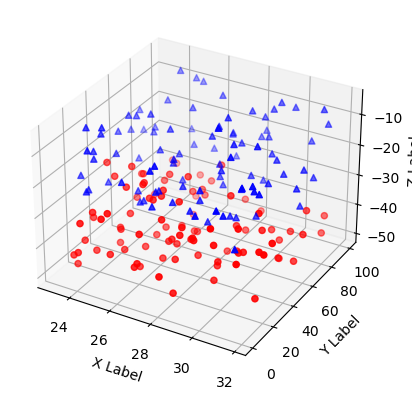

In [5]:
#3d axis
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

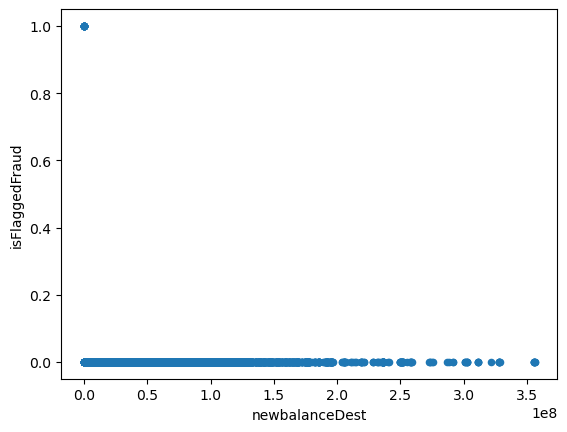

In [6]:
# Create a scatter plot matrix
# for columns= 'newbalanceDest' and 'isFlaggedFraud'
df.plot.scatter(x='newbalanceDest', y='isFlaggedFraud')
plt.show()


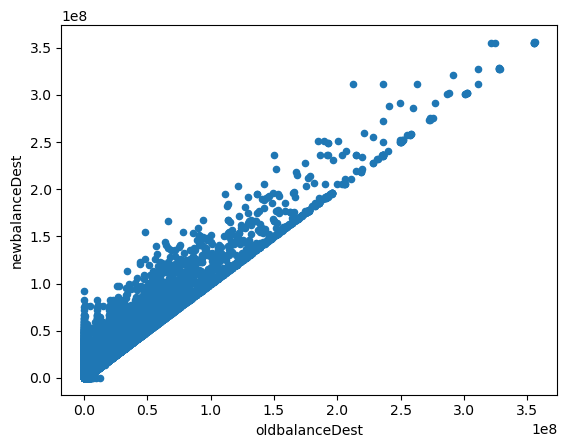

In [18]:
#Scatter Plot of oldbalanceDest	vs. newbalanceDest	vs isFlaggedFraud

# Create a scatter plot matrix
df.plot.scatter(x='oldbalanceDest', y='newbalanceDest')
plt.show()

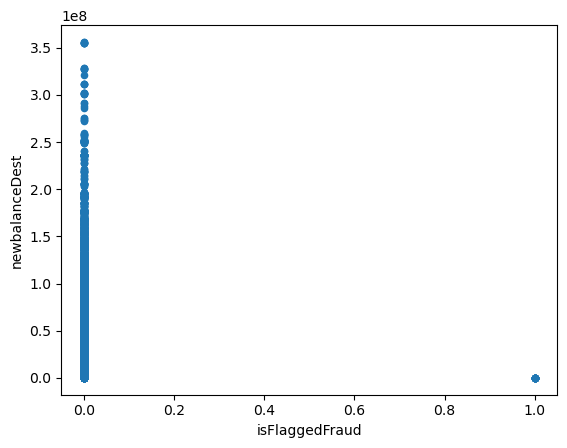

In [19]:
#Scatter Plot of oldbalanceDest	vs. newbalanceDest	vs isFlaggedFraud

# Create a scatter plot matrix
df.plot.scatter(x='isFlaggedFraud', y='newbalanceDest')
plt.show()
